In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn-pastel')
np.set_printoptions(precision=3, suppress=True)

#Извлечение файлов, объединение таблиц, просмотр данных

In [14]:
# извлекаем файлы из архива
from google.colab import drive
drive.mount ('/content/drive')
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/Датасет для ВКР_композиты.zip", "r") as myzip:
    myzip.extractall()
# считываем файлы
bp = pd.read_excel('X_bp.xlsx') 
nup = pd.read_excel('X_nup.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
bp

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [16]:
nup

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [17]:
# объединяем две таблицы по первому столбцу
df = bp.merge(nup, how='inner', on='Unnamed: 0')
# удаляем ненужный теперь столбец
df = df.drop('Unnamed: 0', axis=1)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

#Разведочный анализ данных

In [18]:
df.info() # проверяем наличие пустых ячеек и тип данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [19]:
df.duplicated().sum() # проверяем наличие дубликатов


0

In [20]:
df.describe().T.round(2) # описательная статистика

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки, град                    1023.0    44.25   45.02     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

In [21]:
# обзор гистограмм и графиков рассеяния
plt.figure(figsize=(15,6))
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

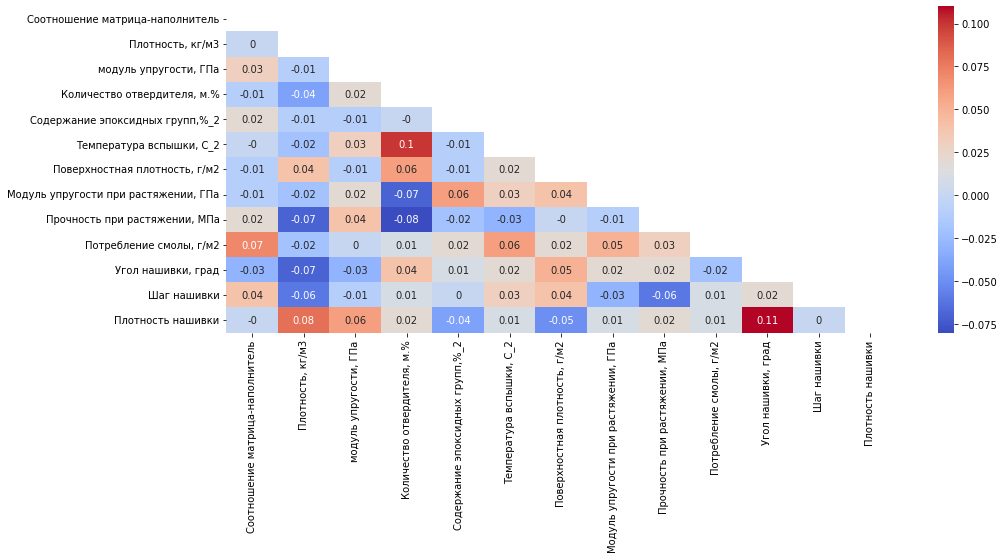

In [22]:
#строим матрицу корреляции
plt.figure(figsize=(15,6))
sns.heatmap(df.corr().round(2), mask = np.triu(df.corr()), annot=True, cmap='coolwarm')

##Общие первичные выводы:

####Распределение почти всех признаков близко к нормальному, кроме:
- "Угол нашивки" (здесь только два значения)
- "Поверхностная плотность" (ассиметрия)

####Значимой корреляции нет ни по одному пересечению переменных

##Рассмотрим данные более детально

In [23]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
df.nunique() #Количество уникальных значений по каждому признаку

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

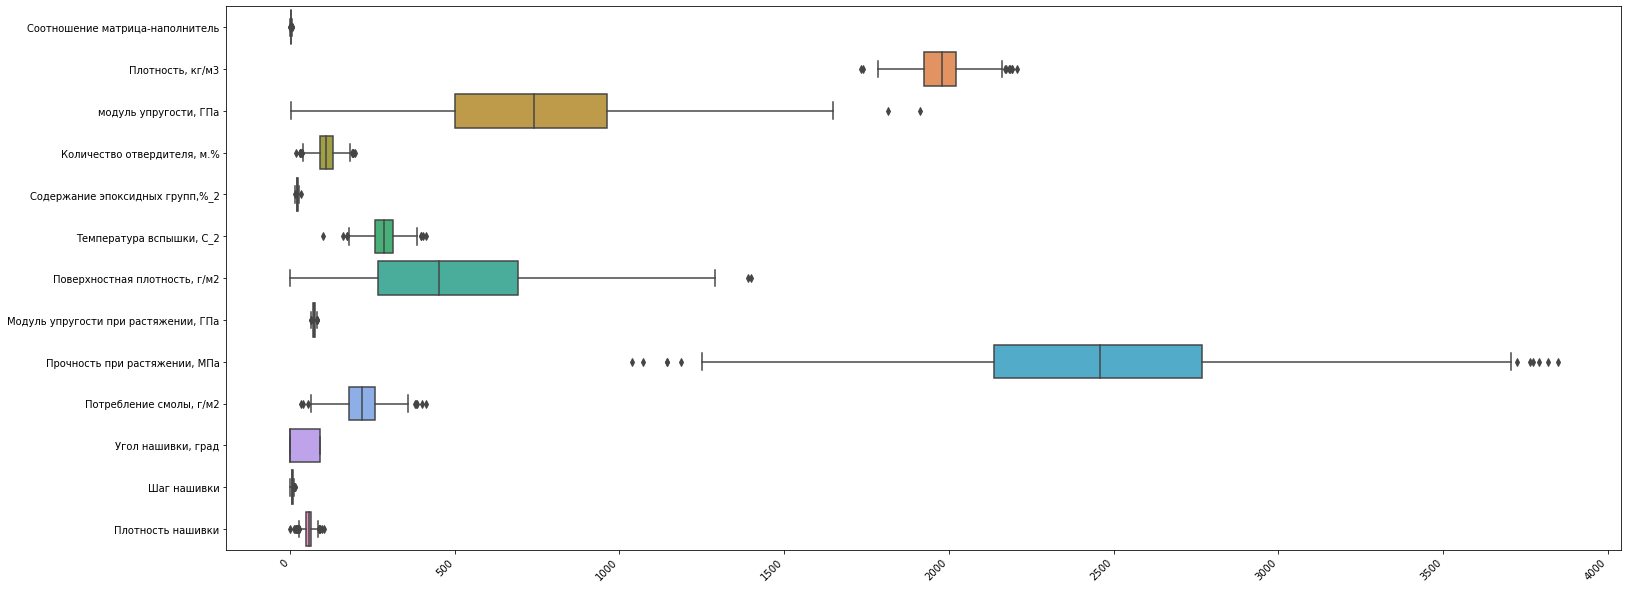

In [25]:
# отрисовка ящиков с усами 
plt.figure(figsize=(25,10))
sns.boxplot(data=df, orient="h")
plt.xticks(rotation=45, ha='right')
plt.show()

#Подготовка данных для построения моделей

Выбросы не удаляем, т.к. условные "выбросы" (по 3 сигмам) не носят явно случайного характера, скорее всего это реальные данные. 
Также это позволит сохранить объем исходных данных.

Удалим строку с нулевыми значениями "Шага нашивки" и "Плотности нашивки".
Скорее всего это ошибка в данных. Такая строка всего одна.

In [26]:
# находим строку с 0
df.loc[df['Плотность нашивки'] == 0]

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
19                         3.532338            1980.0                 1183.0   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
19                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
19                284.615385                         1010.0   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
19                                  78.0                         2000.0   

    Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
19                    300.0                   0          0.0   

    Плотность нашивки  
19                0.0

In [27]:
# убираем строку с 0
df = df[df['Плотность нашивки'] != 0]
df.shape

(1022, 13)

Проведем нормализацию данных

In [28]:
#Нормализация данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

df_norm = MinMaxScaler().fit_transform(df)
df_norm = pd.DataFrame(data = df_norm, columns = df.columns)

df_st = StandardScaler().fit_transform(df)
df_st = pd.DataFrame(data = df_norm, columns = df.columns)

df_norm_n = Normalizer().fit_transform(df)
df_norm_n = pd.DataFrame(data = df_norm_n, columns = df.columns)

In [29]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.282131          0.626533   
1                            0.282131          0.626533   
2                            0.282131          0.626533   
3                            0.282131          0.626533   
4                            0.457857          0.626533   
...                               ...               ...   
1017                         0.361750          0.462855   
1018                         0.587163          0.668737   
1019                         0.555750          0.505470   
1020                         0.637396          0.703842   
1021                         0.657131          0.333290   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.385679                     0.067654   
1                  0.385679                     0.178021   
2                  0.385679                     0.177469   
3                  0.385679                     0.613972   
4                  0.393150                     0.519387   
...                     ...                          ...   
1017               0.476884                     0.382158   
1018               0.231678                     0.707685   
1019               0.217065                     0.512067   
1020               0.387114                     0.682389   
1021               0.217317                     0.614984   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.427467                  0.000000   
1                            0.506535                  0.589311   
2                            1.000000                  0.589311   
3                            0.373167                  0.638420   
4                            0.427467                  0.589311   
...                               ...                       ...   
1017                         0.313057                  0.717503   
1018                         0.285131                  0.492271   
1019                         0.517605                  0.473781   
1020                         0.266309                  0.561107   
1021                         0.705242                  0.641461   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          0.149682                              0.319194   
1                          0.149682                              0.319194   
2                          0.149682                              0.319194   
3                          0.149682                              0.319194   
4                          0.149682                              0.319194   
...                             ...                                   ...   
1017                       0.149109                              0.485125   
1018                       0.250230                              0.475992   
1019                       0.528643                              0.573346   
1020                       0.458108                              0.536217   
1021                       0.541942                              0.550550   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                          0.698235                 0.488979   
1                          0.698235                 0.488979   
2                          0.698235                 0.488979   
3                          0.698235                 0.488979   
4                          0.698235                 0.488979   
...                             ...                      ...   
1017                       0.480312                 0.239516   
1018                       0.470745                 0.220404   
1019                       0.578340                 0.532590   
1020                       0.368070                 0.428909   
1021                       0.647135                 0.422680   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [30]:
df_st

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.282131          0.626533   
1                            0.282131          0.626533   
2                            0.282131          0.626533   
3                            0.282131          0.626533   
4                            0.457857          0.626533   
...                               ...               ...   
1017                         0.361750          0.462855   
1018                         0.587163          0.668737   
1019                         0.555750          0.505470   
1020                         0.637396          0.703842   
1021                         0.657131          0.333290   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.385679                     0.067654   
1                  0.385679                     0.178021   
2                  0.385679                     0.177469   
3                  0.385679                     0.613972   
4                  0.393150                     0.519387   
...                     ...                          ...   
1017               0.476884                     0.382158   
1018               0.231678                     0.707685   
1019               0.217065                     0.512067   
1020               0.387114                     0.682389   
1021               0.217317                     0.614984   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.427467                  0.000000   
1                            0.506535                  0.589311   
2                            1.000000                  0.589311   
3                            0.373167                  0.638420   
4                            0.427467                  0.589311   
...                               ...                       ...   
1017                         0.313057                  0.717503   
1018                         0.285131                  0.492271   
1019                         0.517605                  0.473781   
1020                         0.266309                  0.561107   
1021                         0.705242                  0.641461   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          0.149682                              0.319194   
1                          0.149682                              0.319194   
2                          0.149682                              0.319194   
3                          0.149682                              0.319194   
4                          0.149682                              0.319194   
...                             ...                                   ...   
1017                       0.149109                              0.485125   
1018                       0.250230                              0.475992   
1019                       0.528643                              0.573346   
1020                       0.458108                              0.536217   
1021                       0.541942                              0.550550   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                          0.698235                 0.488979   
1                          0.698235                 0.488979   
2                          0.698235                 0.488979   
3                          0.698235                 0.488979   
4                          0.698235                 0.488979   
...                             ...                      ...   
1017                       0.480312                 0.239516   
1018                       0.470745                 0.220404   
1019                       0.578340                 0.532590   
1020                       0.368070                 0.428909   
1021                       0.647135                 0.422680   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [31]:
df_norm_n

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.000500          0.546880   
1                            0.000499          0.545436   
2                            0.000499          0.545401   
3                            0.000499          0.545011   
4                            0.000744          0.544829   
...                               ...               ...   
1017                         0.000700          0.601520   
1018                         0.001078          0.641541   
1019                         0.000953          0.572927   
1020                         0.001191          0.664389   
1021                         0.001071          0.531558   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.199015                     0.008082   
1                  0.198490                     0.013434   
2                  0.198477                     0.013407   
3                  0.198335                     0.034634   
4                  0.202097                     0.030022   
...                     ...                          ...   
1017               0.281289                     0.026806   
1018               0.139172                     0.045683   
1019               0.121081                     0.032107   
1020               0.238353                     0.045454   
1021               0.117343                     0.036325   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.005999                  0.026940   
1                            0.006381                  0.076473   
2                            0.008866                  0.076468   
3                            0.005705                  0.080543   
4                            0.005976                  0.076388   
...                               ...                       ...   
1017                         0.006201                  0.100077   
1018                         0.006133                  0.079552   
1019                         0.006959                  0.072161   
1020                         0.006187                  0.088652   
1021                         0.007726                  0.084624   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          0.056574                              0.018858   
1                          0.056424                              0.018808   
2                          0.056421                              0.018807   
3                          0.056380                              0.018793   
4                          0.056362                              0.018787   
...                             ...                                   ...   
1017                       0.064463                              0.022522   
1018                       0.109733                              0.022819   
1019                       0.214994                              0.021709   
1020                       0.206205                              0.023802   
1021                       0.213349                              0.020895   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                          0.808197                 0.059268   
1                          0.806064                 0.059111   
2                          0.806011                 0.059107   
3                          0.805435                 0.059065   
4                          0.805167                 0.059046   
...                             ...                      ...   
1017                       0.735625                 0.038520   
1018                       0.738645                 0.036842   
1019                       0.773510                 0.068729   
1020                       0.665970                 0.063368   
1021                       0.803159                 0.054762   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0               0.

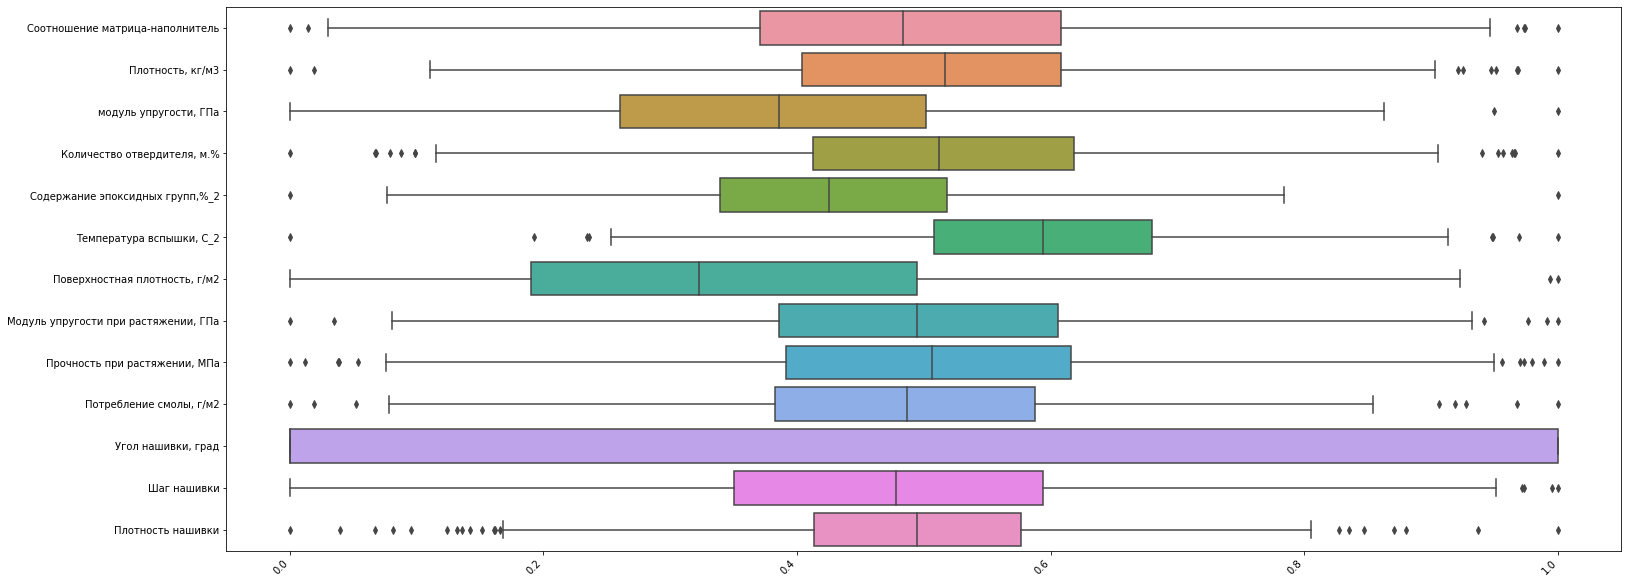

In [32]:
# отрисовка ящиков с усами 
plt.figure(figsize=(25,10))
sns.boxplot(data=df_norm, orient="h")
plt.xticks(rotation=45, ha='right')
plt.show()

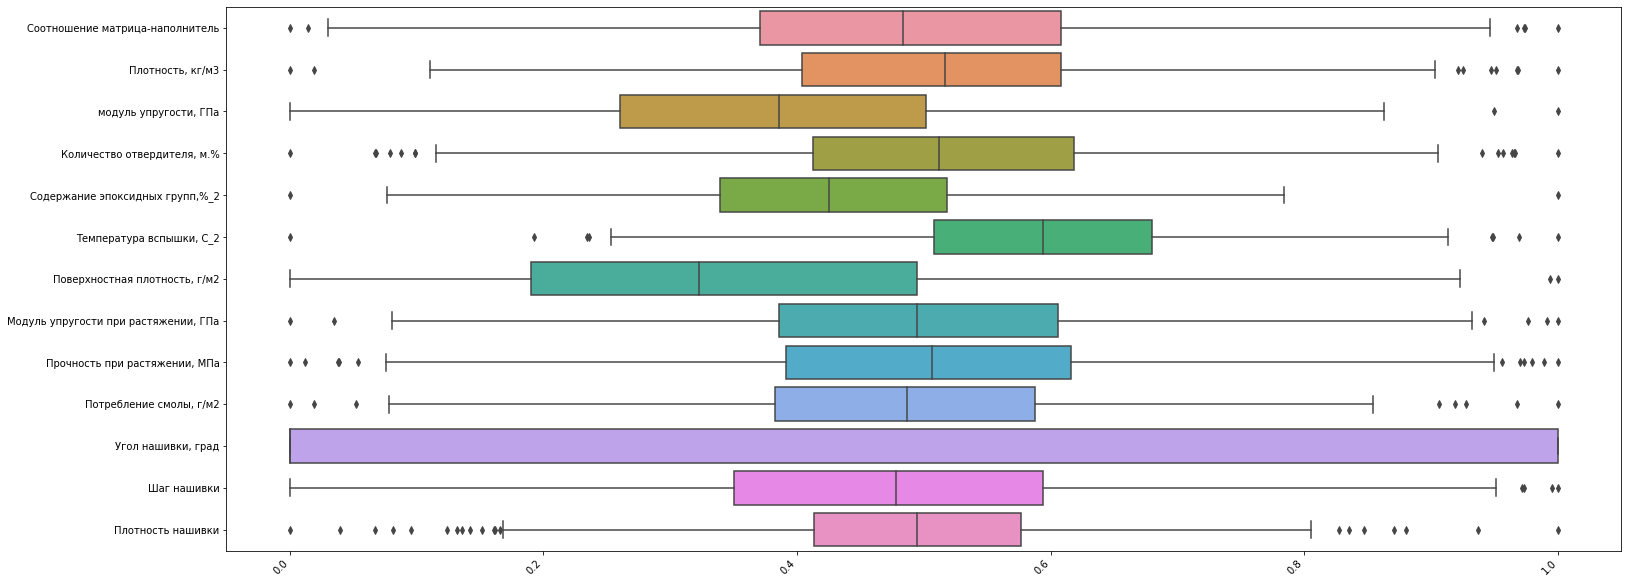

In [33]:
# отрисовка ящиков с усами 
plt.figure(figsize=(25,10))
sns.boxplot(data=df_st, orient="h")
plt.xticks(rotation=45, ha='right')
plt.show()

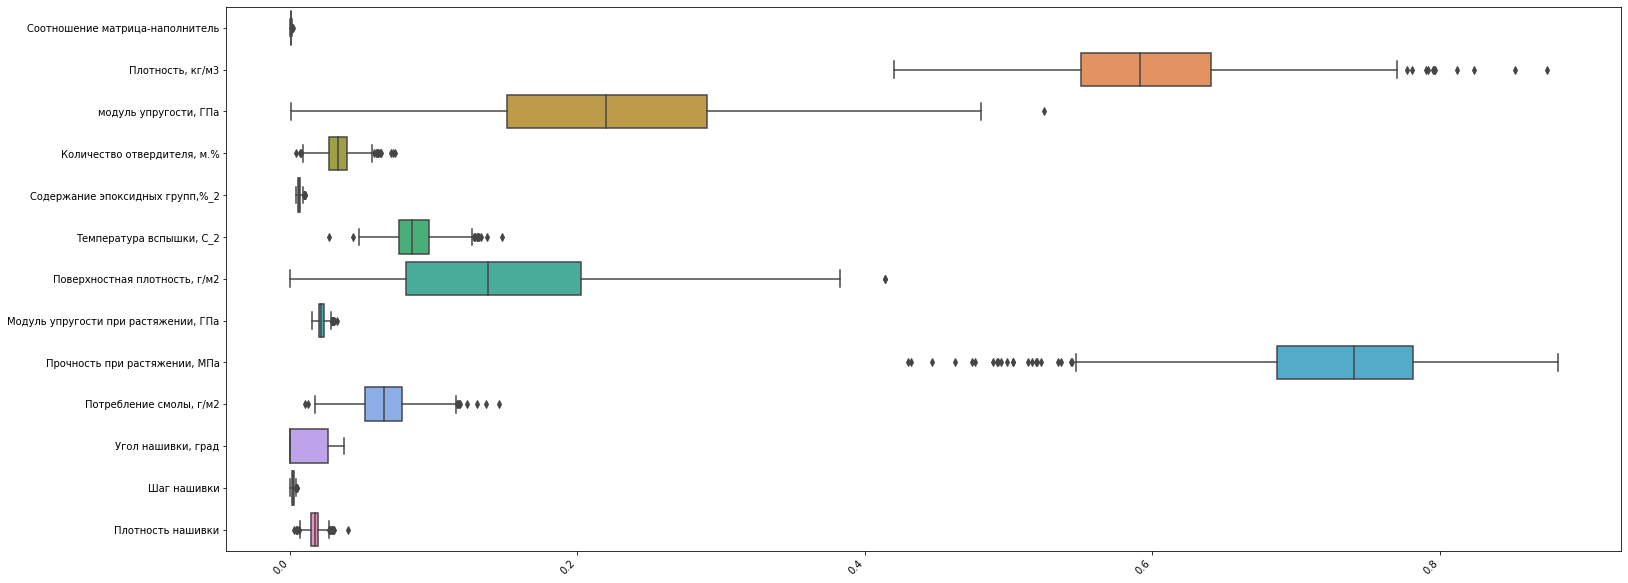

In [34]:
# отрисовка ящиков с усами 
plt.figure(figsize=(25,10))
sns.boxplot(data=df_norm_n, orient="h")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='Density'>

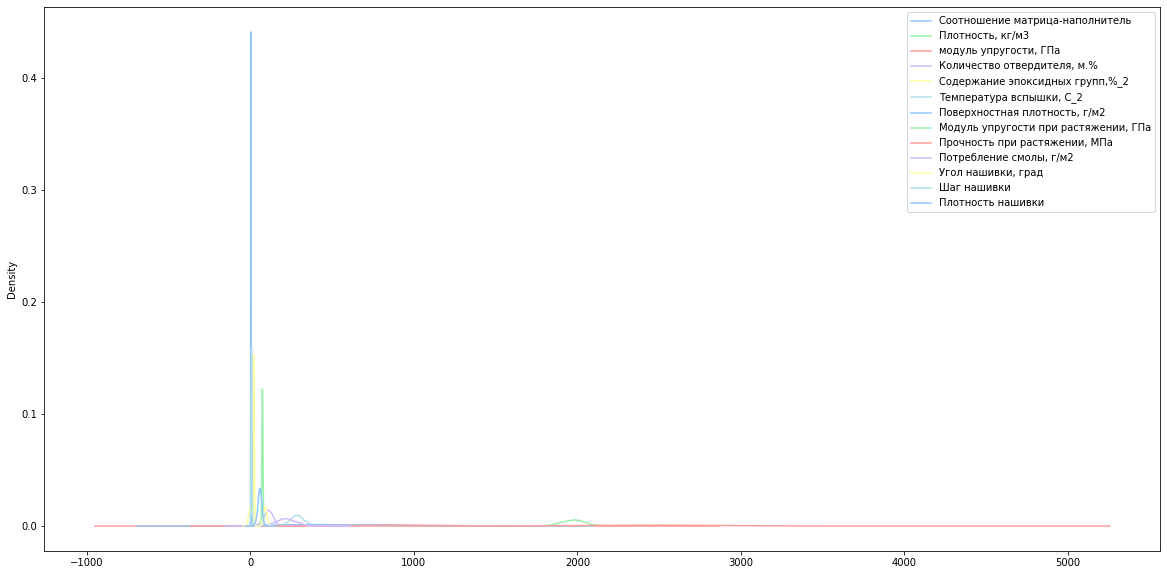

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

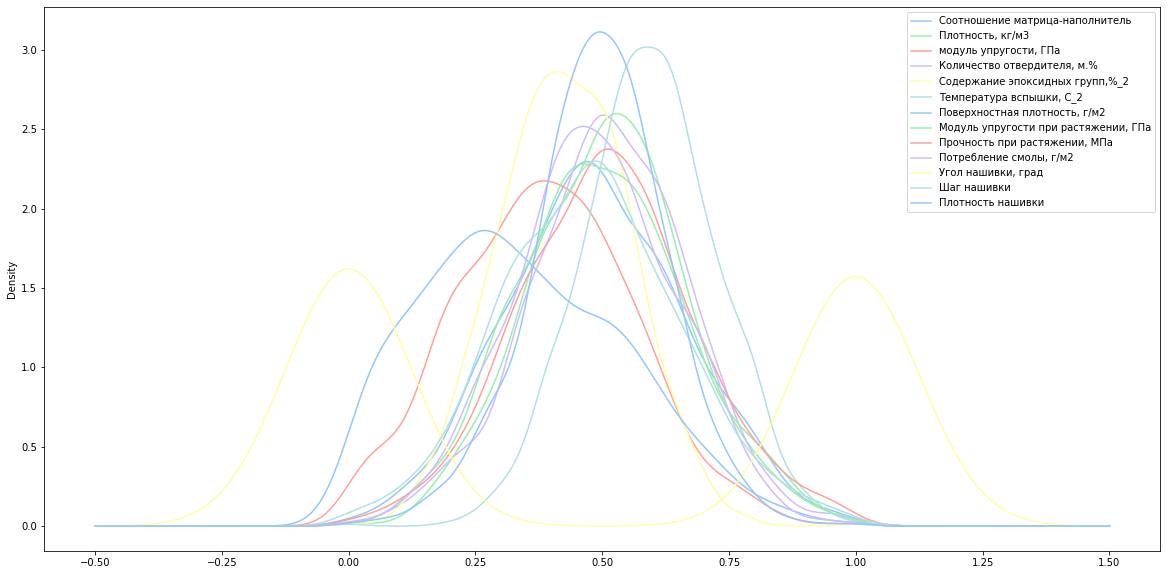

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
df_norm.plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

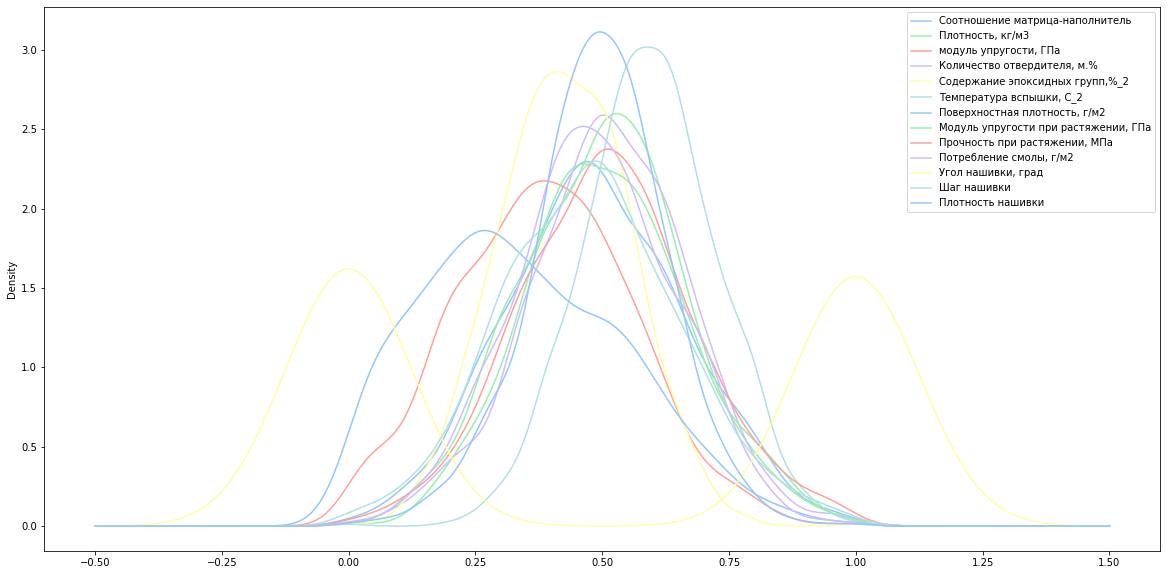

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
df_st.plot(kind='kde', ax=ax)

<Axes: ylabel='Density'>

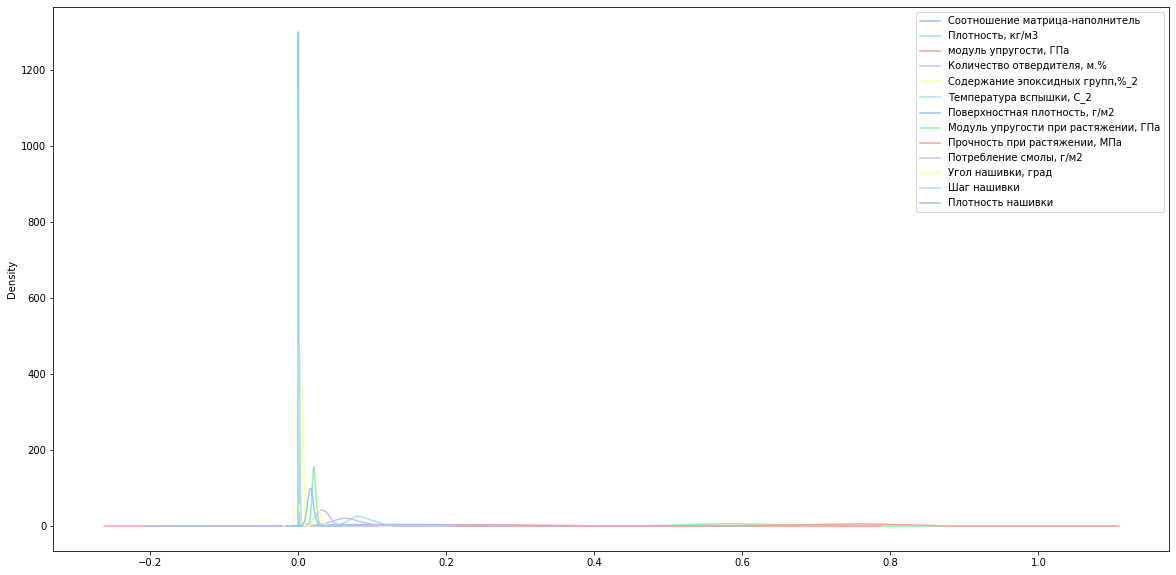

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
df_norm_n.plot(kind='kde', ax=ax)

Сохраняем датафрейм в файл .csv для дальнейшей работы

In [35]:
# сохраним датафрейм в csv для дальнейшей работы
df.to_csv('Dataset_composites.csv', index=False)

In [39]:
!pip install xlwt
df.to_excel('Dataset_composites.xls', index=False)
df_norm.to_excel('Dataset_composites_norm.xls', index=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 5.5 MB/s eta 0:00:00
